# Dataset Analysis

In [1]:
import cv2
import numpy as np

np.set_printoptions(linewidth=200)
image_data = cv2.imread(
    "/home/keerthivasan_user/Documents/git/netweaver/datasets/fashion_mnist_images/train/0/0000.png"
)
image_data_unchanged = cv2.imread(
    "/home/keerthivasan_user/Documents/git/netweaver/datasets/fashion_mnist_images/train/0/0000.png",
    cv2.IMREAD_UNCHANGED,
)

In [2]:
print(f"""Data type of image_data: {type(image_data)} shape: {image_data.shape} dtype: {type(image_data[0][0][0])}
   image_data_unchanged: {type(image_data_unchanged)} shape: {image_data_unchanged.shape}    dtype: {type(image_data_unchanged[0][0])}""")

Data type of image_data: <class 'numpy.ndarray'> shape: (28, 28, 3) dtype: <class 'numpy.uint8'>
   image_data_unchanged: <class 'numpy.ndarray'> shape: (28, 28)    dtype: <class 'numpy.uint8'>


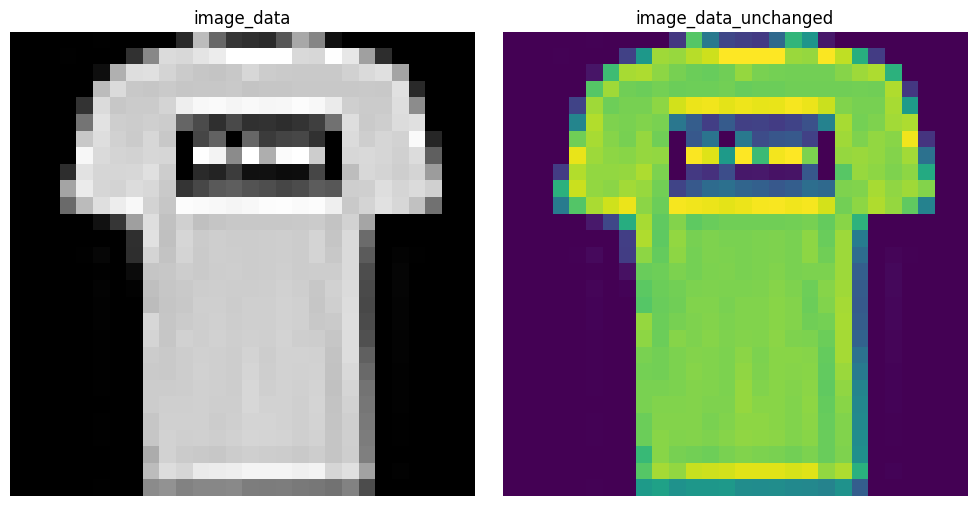

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  17  12  13  70   

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_data)
axes[0].set_title("image_data")
axes[0].axis("off")

axes[1].imshow(image_data_unchanged)
axes[1].set_title("image_data_unchanged")
axes[1].axis("off")

plt.tight_layout()
plt.show()
print(image_data_unchanged)

# Dataset Preparation

In [1]:
import sys

print(*sys.path, sep="\n")

/home/keerthivasan_user/.local/share/uv/python/cpython-3.13.2-linux-x86_64-gnu/lib/python313.zip
/home/keerthivasan_user/.local/share/uv/python/cpython-3.13.2-linux-x86_64-gnu/lib/python3.13
/home/keerthivasan_user/.local/share/uv/python/cpython-3.13.2-linux-x86_64-gnu/lib/python3.13/lib-dynload

/home/keerthivasan_user/Documents/git/netweaver/.venv/lib/python3.13/site-packages
/home/keerthivasan_user/Documents/git/netweaver/src


In [2]:
from netweaver import create_data_mnist, download_fashion_mnist_dataset

## Download

In [3]:
project_root_path = "/home/keerthivasan_user/Documents/git/netweaver"
download_fashion_mnist_dataset(project_root_path)

Fashion_mnish_dataset is already available in /home/keerthivasan_user/Documents/git/netweaver/datasets/fashion_mnist_images


## Load into memory

In [4]:
dataset_path = (
    "/home/keerthivasan_user/Documents/git/netweaver/datasets/fashion_mnist_images"
)
X, y, X_test, y_test = create_data_mnist(dataset_path)

X shape:      (60000, 28, 28) dtype(<class 'numpy.uint8'>) mem usage: 0.044Gb used, y shape:      (60000,) dtype(<class 'numpy.uint8'>) mem usage: 0.000Gb used
X_test shape: (10000, 28, 28) dtype(<class 'numpy.uint8'>) mem usage: 0.007Gb used, y_test shape: (10000,) dtype(<class 'numpy.uint8'>) mem usage: 0.000Gb used


# Data Preprocessing

In [5]:
def min_max_values(X, X_test):
    X_min, X_max = X.min(), X.max()
    X_test_min, X_test_max = X_test.min(), X_test.max()
    print(f"X's      min: {X_min}, max:{X_max}")
    print(f"X_test's min: {X_test_min}, max:{X_test_max}")

## Scaling


In [6]:
import numpy as np


def scale_mopo(arr: np.ndarray, max_half: float):
    return (arr.astype(np.float32) - max_half) / max_half


def scale_zo(arr: np.ndarray, max_value):
    return arr.astype(np.float32) / max_value

In [7]:
min_max_values(X, X_test)

X's      min: 0, max:255
X_test's min: 0, max:255


In [8]:
Xtrain_max_half = X.max() / 2
X_strain = scale_mopo(X, Xtrain_max_half)
X_stest = scale_mopo(X_test, Xtrain_max_half)  # uses the same max_half value

In [9]:
min_max_values(X_strain, X_stest)

X's      min: -1.0, max:1.0
X_test's min: -1.0, max:1.0


## Flattening

In [10]:
X_sftrain = X_strain.reshape(X_strain.shape[0], X_strain.shape[1] * X_strain.shape[2])
X_sftest = X_stest.reshape(X_stest.shape[0], X_stest.shape[1] * X_stest.shape[2])
print(X_sftrain.shape)
print(X_sftest.shape)

(60000, 784)
(10000, 784)


## shuffle

In [11]:
import numpy as np

keys = np.array(range(X_sftrain.shape[0]))
np.random.shuffle(keys)
X_ssftrain = X_sftrain[keys]
y = y[keys]
print(y[:10])

[4 4 5 9 5 3 1 3 0 9]


# Model Architecture and Creation

In [18]:
from netweaver import (
    AccuracyCategorical,
    ActivationSoftmax,
    LayerDense,
    LossCategoricalCrossentropy,
    Model,
    OptimizerAdam,
)

In [19]:
model = Model()

In [20]:
model.add(LayerDense(n_inputs=X_ssftrain.shape[1], n_neurons=20))
model.add(ActivationSoftmax())
model.add(LayerDense(n_inputs=20, n_neurons=20))
model.add(ActivationSoftmax())
model.add(LayerDense(n_inputs=20, n_neurons=10))
model.add(ActivationSoftmax())

In [21]:
model.set(
    loss=LossCategoricalCrossentropy(),
    optimizer=OptimizerAdam(learning_rate=0.01, decay=0.001),
    accuracy=AccuracyCategorical(),
)

In [22]:
model.finalize()

In [24]:
model.train(
    X=X_ssftrain,
    y=y,
    epochs=10,
    batch_size=32,
    print_every=100,
    validation_data=None,
)

Traning...:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/1875 [00:00<?, ?it/s]

step: 0         acc: 0.312     loss: 1.213     data_loss: 1.213     reg_loss: 0.000     lr: 0.0005063 
step: 100       acc: 0.500     loss: 1.068     data_loss: 1.068     reg_loss: 0.000     lr: 0.0005038 
step: 200       acc: 0.500     loss: 1.260     data_loss: 1.260     reg_loss: 0.000     lr: 0.0005013 
step: 300       acc: 0.531     loss: 1.143     data_loss: 1.143     reg_loss: 0.000     lr: 0.0004988 
step: 400       acc: 0.344     loss: 1.213     data_loss: 1.213     reg_loss: 0.000     lr: 0.0004963 
step: 500       acc: 0.438     loss: 1.214     data_loss: 1.214     reg_loss: 0.000     lr: 0.0004938 
step: 600       acc: 0.469     loss: 1.143     data_loss: 1.143     reg_loss: 0.000     lr: 0.0004914 
step: 700       acc: 0.469     loss: 1.367     data_loss: 1.367     reg_loss: 0.000     lr: 0.0004890 
step: 800       acc: 0.344     loss: 1.086     data_loss: 1.086     reg_loss: 0.000     lr: 0.0004866 
step: 900       acc: 0.125     loss: 1.447     data_loss: 1.447     reg_l

Epoch 2:   0%|          | 0/1875 [00:00<?, ?it/s]

step: 0         acc: 0.312     loss: 1.157     data_loss: 1.157     reg_loss: 0.000     lr: 0.0004624 
step: 100       acc: 0.500     loss: 1.068     data_loss: 1.068     reg_loss: 0.000     lr: 0.0004603 
step: 200       acc: 0.500     loss: 1.264     data_loss: 1.264     reg_loss: 0.000     lr: 0.0004582 
step: 300       acc: 0.531     loss: 1.142     data_loss: 1.142     reg_loss: 0.000     lr: 0.0004561 
step: 400       acc: 0.375     loss: 1.208     data_loss: 1.208     reg_loss: 0.000     lr: 0.0004540 
step: 500       acc: 0.438     loss: 1.214     data_loss: 1.214     reg_loss: 0.000     lr: 0.0004520 
step: 600       acc: 0.469     loss: 1.084     data_loss: 1.084     reg_loss: 0.000     lr: 0.0004499 
step: 700       acc: 0.469     loss: 1.372     data_loss: 1.372     reg_loss: 0.000     lr: 0.0004479 
step: 800       acc: 0.344     loss: 1.085     data_loss: 1.085     reg_loss: 0.000     lr: 0.0004459 
step: 900       acc: 0.125     loss: 1.449     data_loss: 1.449     reg_l

Epoch 3:   0%|          | 0/1875 [00:00<?, ?it/s]

step: 0         acc: 0.312     loss: 1.168     data_loss: 1.168     reg_loss: 0.000     lr: 0.0004255 
step: 100       acc: 0.500     loss: 1.069     data_loss: 1.069     reg_loss: 0.000     lr: 0.0004237 
step: 200       acc: 0.531     loss: 1.266     data_loss: 1.266     reg_loss: 0.000     lr: 0.0004219 
step: 300       acc: 0.531     loss: 1.141     data_loss: 1.141     reg_loss: 0.000     lr: 0.0004202 
step: 400       acc: 0.344     loss: 1.212     data_loss: 1.212     reg_loss: 0.000     lr: 0.0004184 
step: 500       acc: 0.438     loss: 1.214     data_loss: 1.214     reg_loss: 0.000     lr: 0.0004167 
step: 600       acc: 0.500     loss: 1.107     data_loss: 1.107     reg_loss: 0.000     lr: 0.0004149 
step: 700       acc: 0.469     loss: 1.371     data_loss: 1.371     reg_loss: 0.000     lr: 0.0004132 
step: 800       acc: 0.344     loss: 1.084     data_loss: 1.084     reg_loss: 0.000     lr: 0.0004115 
step: 900       acc: 0.125     loss: 1.448     data_loss: 1.448     reg_l

Epoch 4:   0%|          | 0/1875 [00:00<?, ?it/s]

step: 0         acc: 0.312     loss: 1.214     data_loss: 1.214     reg_loss: 0.000     lr: 0.0003941 
step: 100       acc: 0.500     loss: 1.068     data_loss: 1.068     reg_loss: 0.000     lr: 0.0003925 
step: 200       acc: 0.531     loss: 1.266     data_loss: 1.266     reg_loss: 0.000     lr: 0.0003910 
step: 300       acc: 0.531     loss: 1.140     data_loss: 1.140     reg_loss: 0.000     lr: 0.0003895 
step: 400       acc: 0.344     loss: 1.212     data_loss: 1.212     reg_loss: 0.000     lr: 0.0003880 
step: 500       acc: 0.312     loss: 1.227     data_loss: 1.227     reg_loss: 0.000     lr: 0.0003865 
step: 600       acc: 0.469     loss: 1.071     data_loss: 1.071     reg_loss: 0.000     lr: 0.0003850 
step: 700       acc: 0.438     loss: 1.298     data_loss: 1.298     reg_loss: 0.000     lr: 0.0003835 
step: 800       acc: 0.344     loss: 1.084     data_loss: 1.084     reg_loss: 0.000     lr: 0.0003820 
step: 900       acc: 0.125     loss: 1.444     data_loss: 1.444     reg_l

Epoch 5:   0%|          | 0/1875 [00:00<?, ?it/s]

step: 0         acc: 0.312     loss: 1.157     data_loss: 1.157     reg_loss: 0.000     lr: 0.0003670 
step: 100       acc: 0.500     loss: 1.068     data_loss: 1.068     reg_loss: 0.000     lr: 0.0003656 
step: 200       acc: 0.531     loss: 1.266     data_loss: 1.266     reg_loss: 0.000     lr: 0.0003643 
step: 300       acc: 0.531     loss: 1.141     data_loss: 1.141     reg_loss: 0.000     lr: 0.0003630 
step: 400       acc: 0.344     loss: 1.211     data_loss: 1.211     reg_loss: 0.000     lr: 0.0003617 
step: 500       acc: 0.312     loss: 1.216     data_loss: 1.216     reg_loss: 0.000     lr: 0.0003604 
step: 600       acc: 0.500     loss: 1.068     data_loss: 1.068     reg_loss: 0.000     lr: 0.0003591 
step: 700       acc: 0.438     loss: 1.213     data_loss: 1.213     reg_loss: 0.000     lr: 0.0003578 
step: 800       acc: 0.344     loss: 1.083     data_loss: 1.083     reg_loss: 0.000     lr: 0.0003565 
step: 900       acc: 0.125     loss: 1.410     data_loss: 1.410     reg_l

Epoch 6:   0%|          | 0/1875 [00:00<?, ?it/s]

step: 0         acc: 0.312     loss: 1.224     data_loss: 1.224     reg_loss: 0.000     lr: 0.0003433 
step: 100       acc: 0.500     loss: 1.067     data_loss: 1.067     reg_loss: 0.000     lr: 0.0003422 
step: 200       acc: 0.531     loss: 1.267     data_loss: 1.267     reg_loss: 0.000     lr: 0.0003410 
step: 300       acc: 0.531     loss: 1.141     data_loss: 1.141     reg_loss: 0.000     lr: 0.0003398 
step: 400       acc: 0.344     loss: 1.211     data_loss: 1.211     reg_loss: 0.000     lr: 0.0003387 
step: 500       acc: 0.312     loss: 1.216     data_loss: 1.216     reg_loss: 0.000     lr: 0.0003376 
step: 600       acc: 0.500     loss: 1.068     data_loss: 1.068     reg_loss: 0.000     lr: 0.0003364 
step: 700       acc: 0.469     loss: 1.213     data_loss: 1.213     reg_loss: 0.000     lr: 0.0003353 
step: 800       acc: 0.344     loss: 1.083     data_loss: 1.083     reg_loss: 0.000     lr: 0.0003342 
step: 900       acc: 0.125     loss: 1.408     data_loss: 1.408     reg_l

Epoch 7:   0%|          | 0/1875 [00:00<?, ?it/s]

step: 0         acc: 0.312     loss: 1.237     data_loss: 1.237     reg_loss: 0.000     lr: 0.0003226 
step: 100       acc: 0.500     loss: 1.067     data_loss: 1.067     reg_loss: 0.000     lr: 0.0003215 
step: 200       acc: 0.531     loss: 1.266     data_loss: 1.266     reg_loss: 0.000     lr: 0.0003205 
step: 300       acc: 0.531     loss: 1.141     data_loss: 1.141     reg_loss: 0.000     lr: 0.0003195 
step: 400       acc: 0.375     loss: 1.207     data_loss: 1.207     reg_loss: 0.000     lr: 0.0003185 
step: 500       acc: 0.312     loss: 1.221     data_loss: 1.221     reg_loss: 0.000     lr: 0.0003175 
step: 600       acc: 0.500     loss: 1.067     data_loss: 1.067     reg_loss: 0.000     lr: 0.0003165 
step: 700       acc: 0.438     loss: 1.213     data_loss: 1.213     reg_loss: 0.000     lr: 0.0003155 
step: 800       acc: 0.344     loss: 1.082     data_loss: 1.082     reg_loss: 0.000     lr: 0.0003145 
step: 900       acc: 0.125     loss: 1.452     data_loss: 1.452     reg_l

Epoch 8:   0%|          | 0/1875 [00:00<?, ?it/s]

step: 0         acc: 0.312     loss: 1.224     data_loss: 1.224     reg_loss: 0.000     lr: 0.0003042 
step: 100       acc: 0.500     loss: 1.067     data_loss: 1.067     reg_loss: 0.000     lr: 0.0003033 
step: 200       acc: 0.531     loss: 1.269     data_loss: 1.269     reg_loss: 0.000     lr: 0.0003023 
step: 300       acc: 0.531     loss: 1.139     data_loss: 1.139     reg_loss: 0.000     lr: 0.0003014 
step: 400       acc: 0.344     loss: 1.209     data_loss: 1.209     reg_loss: 0.000     lr: 0.0003005 
step: 500       acc: 0.312     loss: 1.215     data_loss: 1.215     reg_loss: 0.000     lr: 0.0002996 
step: 600       acc: 0.500     loss: 1.066     data_loss: 1.066     reg_loss: 0.000     lr: 0.0002987 
step: 700       acc: 0.438     loss: 1.213     data_loss: 1.213     reg_loss: 0.000     lr: 0.0002978 
step: 800       acc: 0.344     loss: 1.081     data_loss: 1.081     reg_loss: 0.000     lr: 0.0002970 
step: 900       acc: 0.125     loss: 1.456     data_loss: 1.456     reg_l

Epoch 9:   0%|          | 0/1875 [00:00<?, ?it/s]

step: 0         acc: 0.312     loss: 1.227     data_loss: 1.227     reg_loss: 0.000     lr: 0.0002878 
step: 100       acc: 0.500     loss: 1.067     data_loss: 1.067     reg_loss: 0.000     lr: 0.0002869 
step: 200       acc: 0.531     loss: 1.270     data_loss: 1.270     reg_loss: 0.000     lr: 0.0002861 
step: 300       acc: 0.531     loss: 1.138     data_loss: 1.138     reg_loss: 0.000     lr: 0.0002853 
step: 400       acc: 0.344     loss: 1.210     data_loss: 1.210     reg_loss: 0.000     lr: 0.0002845 
step: 500       acc: 0.312     loss: 1.214     data_loss: 1.214     reg_loss: 0.000     lr: 0.0002837 
step: 600       acc: 0.500     loss: 1.065     data_loss: 1.065     reg_loss: 0.000     lr: 0.0002829 
step: 700       acc: 0.438     loss: 1.232     data_loss: 1.232     reg_loss: 0.000     lr: 0.0002821 
step: 800       acc: 0.344     loss: 1.081     data_loss: 1.081     reg_loss: 0.000     lr: 0.0002813 
step: 900       acc: 0.125     loss: 1.449     data_loss: 1.449     reg_l

Epoch 10:   0%|          | 0/1875 [00:00<?, ?it/s]

step: 0         acc: 0.312     loss: 1.223     data_loss: 1.223     reg_loss: 0.000     lr: 0.0002730 
step: 100       acc: 0.500     loss: 1.068     data_loss: 1.068     reg_loss: 0.000     lr: 0.0002723 
step: 200       acc: 0.531     loss: 1.271     data_loss: 1.271     reg_loss: 0.000     lr: 0.0002716 
step: 300       acc: 0.531     loss: 1.138     data_loss: 1.138     reg_loss: 0.000     lr: 0.0002708 
step: 400       acc: 0.375     loss: 1.210     data_loss: 1.210     reg_loss: 0.000     lr: 0.0002701 
step: 500       acc: 0.312     loss: 1.239     data_loss: 1.239     reg_loss: 0.000     lr: 0.0002694 
step: 600       acc: 0.469     loss: 1.093     data_loss: 1.093     reg_loss: 0.000     lr: 0.0002686 
step: 700       acc: 0.438     loss: 1.213     data_loss: 1.213     reg_loss: 0.000     lr: 0.0002679 
step: 800       acc: 0.344     loss: 1.081     data_loss: 1.081     reg_loss: 0.000     lr: 0.0002672 
step: 900       acc: 0.125     loss: 1.442     data_loss: 1.442     reg_l

In [8]:
from time import sleep
from tqdm.auto import tqdm

for _i in tqdm(range(3), position=0, leave=True):
    for _j in tqdm(range(3), position=1, leave=True):
        sleep(1)
        tqdm.write(f"Hello from iteration {_i}, {_j}")

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Hello from iteration 0, 0
Hello from iteration 0, 1
Hello from iteration 0, 1
Hello from iteration 0, 2
Hello from iteration 0, 2


  0%|          | 0/3 [00:00<?, ?it/s]

Hello from iteration 1, 0
Hello from iteration 1, 1
Hello from iteration 1, 1
Hello from iteration 1, 2
Hello from iteration 1, 2


  0%|          | 0/3 [00:00<?, ?it/s]

Hello from iteration 2, 0
Hello from iteration 2, 1
Hello from iteration 2, 1
Hello from iteration 2, 2
Hello from iteration 2, 2


In [2]:
x: int


def call_me_fuction():
    pass


class CallMeClass:
    pass


globals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  'globals()',
  'x: int\n\n\ndef call_me_fuction():\n    pass\n\n\nclass CallMeClass:\n    pass\n\n\nglobals()'],
 '_oh': {1: {...}},
 '_dh': [PosixPath('/home/keerthivasan_user/Documents/git/netweaver/notebooks')],
 'In': ['',
  'globals()',
  'x: int\n\n\ndef call_me_fuction():\n    pass\n\n\nclass CallMeClass:\n    pass\n\n\nglobals()'],
 'Out': {1: {...}},
 'get_ipython': <bound method InteractiveShell.get_ipython of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x7caee8691940>>,
 'exit': <IPython.core.autocall.ZMQExitAutocall at 0x7caee84b9be0>,
 'quit': <IPython.core.autocall.ZMQExitAutocall at 0x7caee84b9be0>,
 'open': <function _io.open(file, mode='r', buffering=-1, encoding=None, errors=None, newline